In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

100%|██████████| 100/100 [00:16<00:00,  5.94it/s]


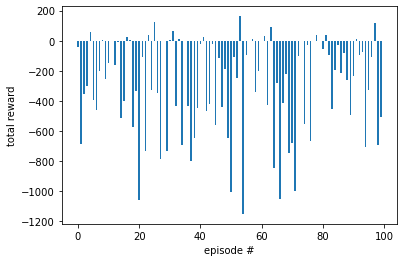

In [2]:
"""
Testing RL agent which randomly chooses actions
"""
import sys
sys.path.append('../')
from typing import List
import numpy as np
import os
import pandas as pd
import gym
from envs.battery_storage import BatteryStorageEnv
from tqdm import tqdm
import matplotlib.pyplot as plt

env = BatteryStorageEnv()

episodes = 100

rewards_lst_1 = []

for i in tqdm(range(episodes)):
    ob = env.reset()
    done = False
    rewards = np.zeros(env.MAX_STEPS_PER_EPISODE)

    while not done:
        # random action as policy
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        rewards[env.count - 1] = reward
    rewards_lst_1.append(np.sum(rewards))

# plot episode # versus total episode reward
plt.bar(list(range(episodes)), rewards_lst_1, width=0.5)

# naming the x axis 
plt.xlabel('episode #') 
# naming the y axis 
plt.ylabel('total reward')

plt.show()

100%|██████████| 100/100 [00:17<00:00,  5.62it/s]


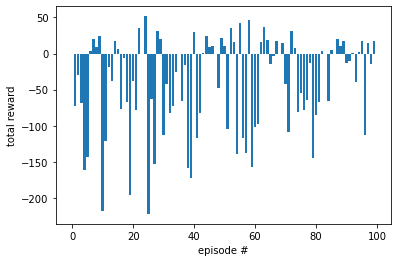

In [3]:
"""
Testing RL agent which chooses charging versus discharging based on the current price
in relation to the running average price.
"""
import sys
sys.path.append('../')
from typing import List
import numpy as np
import os
import pandas as pd
import gym
from envs.battery_storage import BatteryStorageEnv
from tqdm import tqdm
import matplotlib.pyplot as plt

env = BatteryStorageEnv()

episodes = 100

rewards_lst_2 = []

for i in tqdm(range(episodes)):
    ob = env.reset(options = {'reward': 1})
    done = False
    start = True
    rewards = np.zeros(env.MAX_STEPS_PER_EPISODE)
    avg = np.zeros(1)

    while not done:
        if start:
            action = env.action_space.sample()
            state, reward, done, info = env.step(action)
            avg = info['running_avg']
            start = False
        else:
            if env.curr_price >= avg:
                action = np.random.uniform(env.action_space.low, 0.0)
            else:
                action = np.random.uniform(0.0, env.action_space.high)
            state, reward, done, info = env.step(action)
            avg = info['running_avg']

        rewards[env.count - 1] = reward
    rewards_lst_2.append(np.sum(rewards))

# plot episode # versus total episode reward
plt.bar(list(range(episodes)), rewards_lst_2)

# naming the x axis 
plt.xlabel('episode #') 
# naming the y axis 
plt.ylabel('total reward')

plt.show()

In [4]:
"""
Testing environment with stable_baselines3 library
"""

from stable_baselines3.common.env_checker import check_env

env = BatteryStorageEnv()

check_env(env)

/home/ubuntu/.conda/envs/sustaingym/lib/python3.9/site-packages/stable_baselines3/common/env_checker.py:272: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(


100%|██████████| 100/100 [00:27<00:00,  3.65it/s]


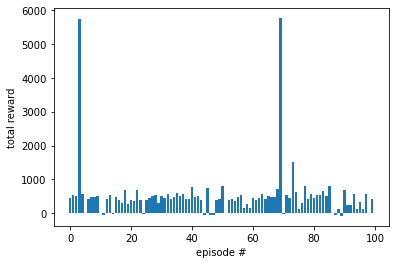

In [6]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise
from stable_baselines3 import DDPG

env = BatteryStorageEnv()

# the noise objects for DDPG
# n_actions = env.action_space.shape[-1]
# action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))

# model = DDPG(MlpPolicy, env, action_noise=action_noise, verbose=1)
# model.learn(total_timesteps=200000)
# model.save("ddpg_simple_battery_env")

# del model # remove to demonstrate saving and loading

model = DDPG.load("ddpg_simple_battery_env")

episodes = 100

rewards_lst_3 = []

for i in tqdm(range(episodes)):
    obs = env.reset()
    done = False
    start = True
    rewards = np.zeros(env.MAX_STEPS_PER_EPISODE)
    avg = np.zeros(1)
    while not done:
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards[env.count - 1] = reward
    rewards_lst_3.append(np.sum(rewards))

# plot episode # versus total episode reward
plt.bar(list(range(episodes)), rewards_lst_3)

# naming the x axis 
plt.xlabel('episode #') 
# naming the y axis 
plt.ylabel('total reward')

plt.show()


100%|██████████| 100/100 [00:26<00:00,  3.82it/s]


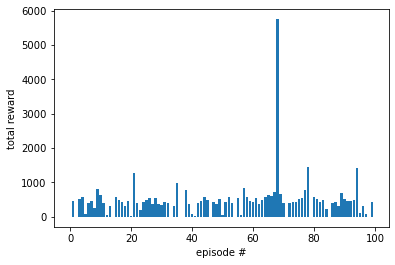

In [7]:
from stable_baselines3 import PPO

env = BatteryStorageEnv()

# model = PPO("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=200000, log_interval=100)
# model.save("ppo_simple_battery_env")

# del model # remove to demonstrate saving and loading

model = PPO.load("ppo_simple_battery_env")

episodes = 100

rewards_lst_4 = []

for i in tqdm(range(episodes)):
    obs = env.reset()
    done = False
    start = True
    rewards = np.zeros(env.MAX_STEPS_PER_EPISODE)
    avg = np.zeros(1)
    while not done:
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards[env.count - 1] = reward
    rewards_lst_4.append(np.sum(rewards))

# plot episode # versus total episode reward
plt.bar(list(range(episodes)), rewards_lst_4)

# naming the x axis 
plt.xlabel('episode #') 
# naming the y axis 
plt.ylabel('total reward')

plt.show()

100%|██████████| 100/100 [00:27<00:00,  3.63it/s]


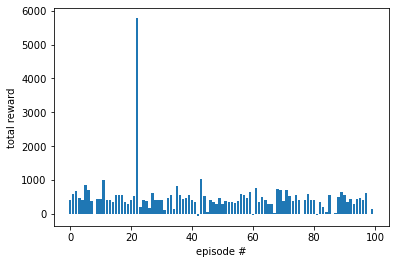

In [8]:
from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise

env = BatteryStorageEnv()

# The noise objects for TD3
# n_actions = env.action_space.shape[-1]
# action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# model = TD3("MlpPolicy", env, action_noise=action_noise, verbose=1)
# model.learn(total_timesteps=200000, log_interval=100)
# model.save("td3_simple_battery_env")

# del model # remove to demonstrate saving and loading

model = TD3.load("td3_simple_battery_env")

episodes = 100

rewards_lst_5 = []

for i in tqdm(range(episodes)):
    obs = env.reset()
    done = False
    start = True
    rewards = np.zeros(env.MAX_STEPS_PER_EPISODE)
    avg = np.zeros(1)
    while not done:
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards[env.count - 1] = reward
    rewards_lst_5.append(np.sum(rewards))

# plot episode # versus total episode reward
plt.bar(list(range(episodes)), rewards_lst_5)

# naming the x axis 
plt.xlabel('episode #') 
# naming the y axis 
plt.ylabel('total reward')

plt.show()

100%|██████████| 100/100 [00:26<00:00,  3.80it/s]


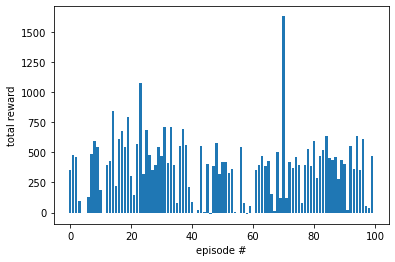

In [9]:
from stable_baselines3 import A2C

env = BatteryStorageEnv()

# model = A2C("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=200000, log_interval=10)
# model.save("a2c_simple_battery_env")

# del model # remove to demonstrate saving and loading

model = A2C.load("a2c_simple_battery_env")

episodes = 100

rewards_lst_6 = []

for i in tqdm(range(episodes)):
    obs = env.reset()
    done = False
    start = True
    rewards = np.zeros(env.MAX_STEPS_PER_EPISODE)
    avg = np.zeros(1)
    while not done:
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        rewards[env.count - 1] = reward
    rewards_lst_6.append(np.sum(rewards))

# plot episode # versus total episode reward
plt.bar(list(range(episodes)), rewards_lst_6)

# naming the x axis 
plt.xlabel('episode #') 
# naming the y axis 
plt.ylabel('total reward')

plt.show()

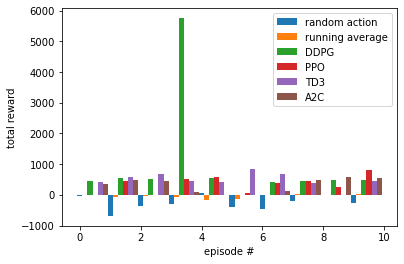

In [23]:
width = (1 / 6)
id = np.arange(episodes - 90)
# plot episode # versus total episode reward
plt.bar(id, rewards_lst_1[:10], width, label='random action')
plt.bar(id + width, rewards_lst_2[:10], width, label='running average')
plt.bar(id + 2*width, rewards_lst_3[:10], width, label='DDPG')
plt.bar(id + 3*width, rewards_lst_4[:10], width, label='PPO')
plt.bar(id + 4*width, rewards_lst_5[:10], width, label='TD3')
plt.bar(id + 5*width, rewards_lst_6[:10], width, label='A2C')

# naming the x axis 
plt.xlabel('episode #') 
# naming the y axis 
plt.ylabel('total reward')

plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


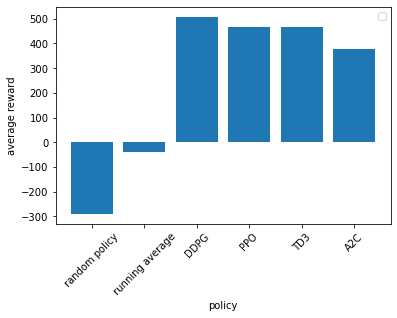

In [27]:
avg_random_policy = np.mean(np.array(rewards_lst_1))
avg_running_avg_price_policy = np.mean(np.array(rewards_lst_2))
avg_DDPG_policy = np.mean(np.array(rewards_lst_3))
avg_PPO_policy = np.mean(np.array(rewards_lst_4))
avg_TD3_policy = np.mean(np.array(rewards_lst_5))
avg_A2C_policy = np.mean(np.array(rewards_lst_6))

avg_lst = [avg_random_policy, avg_running_avg_price_policy, avg_DDPG_policy, avg_PPO_policy, avg_TD3_policy, avg_A2C_policy]
policies = ['random policy', 'running average', 'DDPG', 'PPO', 'TD3', 'A2C']

plt.bar(policies, avg_lst)

plt.xticks(range(len(policies)), policies, rotation=45)

# naming the x axis 
plt.xlabel('policy') 
# naming the y axis 
plt.ylabel('average reward')

plt.legend()

plt.show()